# WORK IN PROGRESS

NLP Techniques 
From: https://www.youtube.com/watch?v=M7SWr5xObkA (PyCon 2020)

Additional Resources: [Sklearn feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html)

### Bag of Words

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

train_x = ["i love the book", "this is a great book", "the fit is great", "i love the shoes"]

vectorizer = CountVectorizer(binary=True)
train_x_vectors = vectorizer.fit_transform(train_x)

print(vectorizer.get_feature_names_out())
print(train_x_vectors.toarray())

['book' 'fit' 'great' 'is' 'love' 'shoes' 'the' 'this']
[[1 0 0 0 1 0 1 0]
 [1 0 1 1 0 0 0 1]
 [0 1 1 1 0 0 1 0]
 [0 0 0 0 1 1 1 0]]


# Word Vectors
Capture the semantic meaning of a word 
continuous bag of words: 
skip gram: 
Both look at a window of text (e.g., "Best book I've ever read) and look at different tokens and will utilize the surrounding tokens. For example, "book" with "read" or "story" and "characters" might be in a similar in vector space. We can start building out bigger relationships.  

spaCy: https://spacy.io/

In [ ]:
!pip install Spacy

#Working with Text

## Regex (Regular Expressions)

## Stemming and Lemmatization

## Removing Stop Words 

# Various Other Techniques (Spell Correction, Sentiment, POS Tagging)

NLTK Library 

TextBlob 

#Recurrent Neural Networks

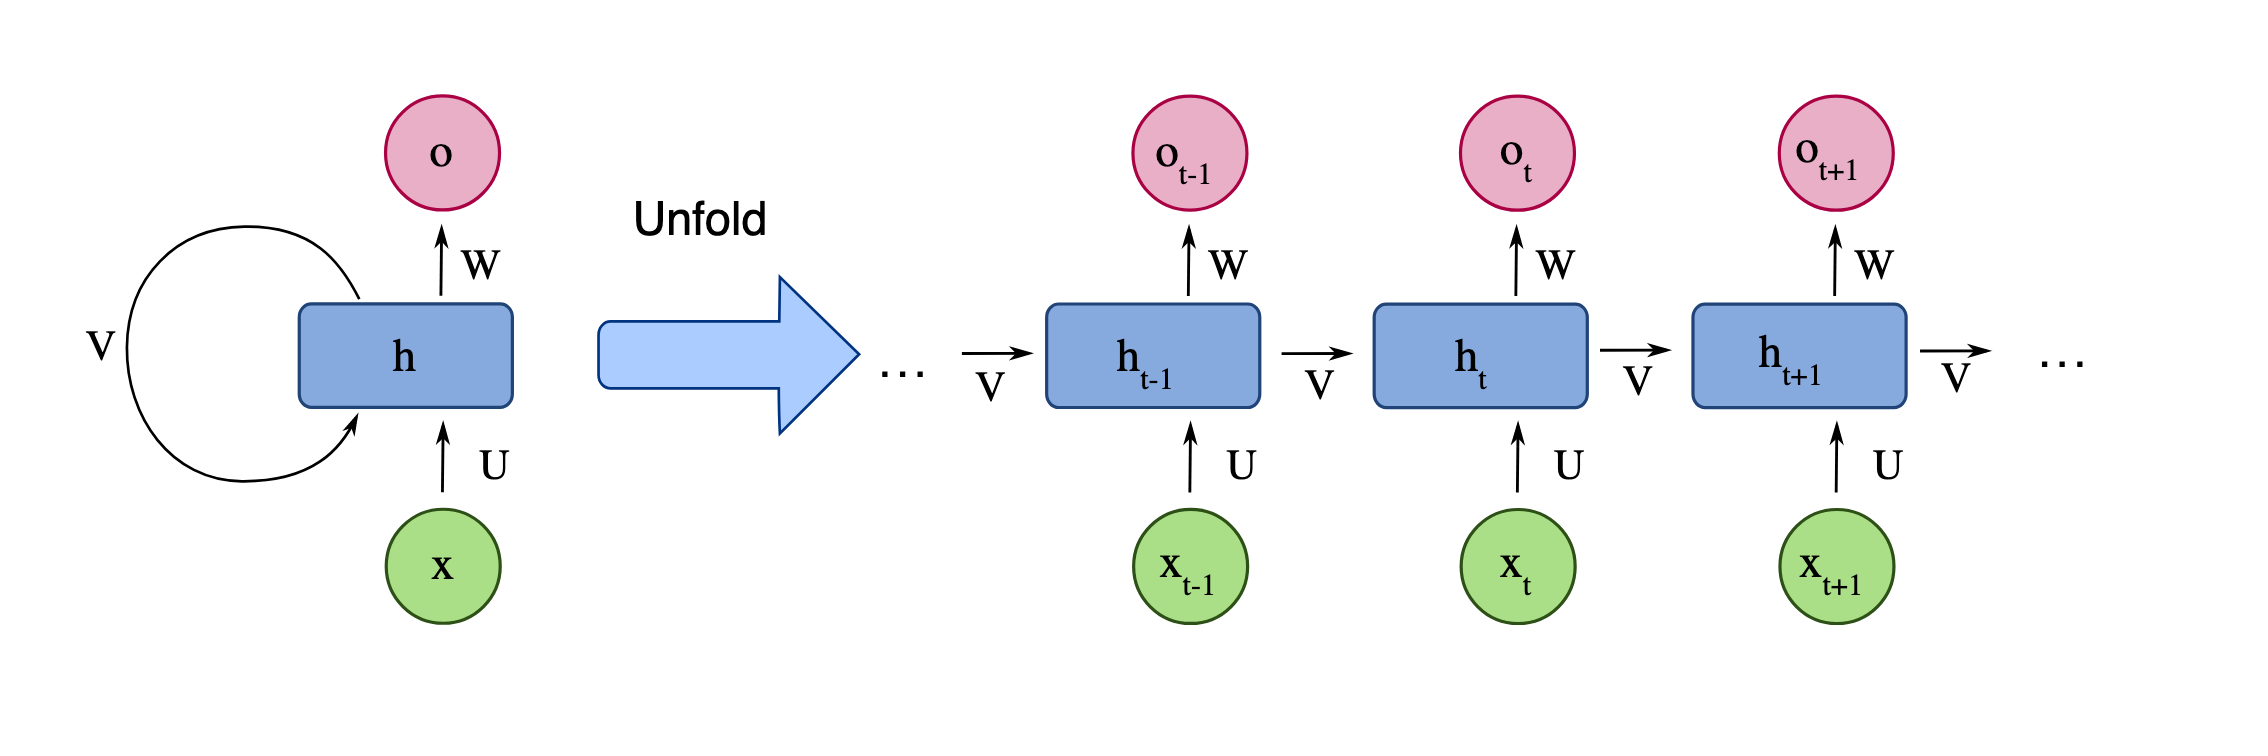